# **Decision Trees**

Meng Chen, PhD, Data Science Fellow at Insight Data Science

---
## **Summary**
* For both **Classification** and **Regression** task, even **Multioutput** (ID3) task
* Capable of fitting complex datasets
* Requiring very little data preparation; no requaring feature scaling or centering at all
*  ___Gini___ measuring nodes' ___impurity___
* Information gain using ___entropy___

## **References**
1. Géron, A. 2017. Hands-Machine Learning with Scikit-Learn & TensorFlow. O'Reily Inc.             
2. Grus, J. 2019. Data Science from Scratch. O'Reily Inc.
3. Plotting the decision boundaries in 3D for logistic regression using XGBoost (https://towardsdatascience.com/plotting-decision-boundaries-in-3d-logistic-regression-and-xgboost-e68ce0535b4b)
4. Golf example of decision trees. https://towardsdatascience.com/entropy-how-decision-trees-make-decisions-2946b9c18c8

## **Concept**
### What is the decision tree?
A decision tree uses a tree structure to represent a number of possible decision paths and an outcome for each path.

The basis of tree-based learners is the decision tree wherein a series of decision rules (e.g., “If their gender is male...”) are chained. The result looks vaguely like an upside-down tree, with the first decision rule at the top and subsequent decision rules spreading out below. In a decision tree, every decision rule occurs at a decision node, with the rule creating branches leading to new nodes. A branch without a decision rule at the end is called a *leaf*. <font color=red><b>Note: the interpretability of decision tree is great.</b></font>
* Pros
    * easy to understand and intepret
    * easy to handle numeric and categorical features
* Cons
    * hard problem
    * computaional expensive
    * easy to ***overfit***
* Two common algorithms
    * CART
    * ID3
* Metrics for finding the best trees
    * **Gini** purity index
    * Information gain **entropy**
* The fundamental components of the Random Forests
    
### How to select the features?
Using mulitple methods/tools to select the features:
* Feature importance
* Recursive feature elimination

## **Algorithms** 
––– *NP problem, greedy recursieve algorithms*
### **Decision Tree**
### Classificaiton and Regression Trees (CART)
* `Scikit-Learn` applies the **CART** algorithms
* Process: 
    * splits the training sets intwo subsets using a single $k$ and a threshod $t_k$; 
    * searches for the pair($k$, $t_k$) that produces the purest subsets (weighted by their size)
    * Recursively continuing until it reaches the maximum depth
    * A **greedy** algorithm


* Hyperparameters:
    * `max_depth`
    * `min_samples_split`
    * `min_samples_leaf`
    * `min_weight_fraction_leaf`
    * `max_leaf_nodes`


* Training dataset size
    * Small: speeding up training by presorting data(set ***presort***=TRUE)
    * Large: slowing down considerably


* Cost functions
    * Classification
        * Gini (0: 'pure' (all training instances it applies to belong to the same class): 
    $$G_i = 1 - \displaystyle\sum_{k=1}^{n}{p_{i, k}}^2$$
        
            where $p_{i,k}$ is the ratio of class ___k___ instances among the training instances in the $i^{th}$ node.
            * Resulting Gini (weighted average): 
$$G(k,t_{k})=\frac{m_{left}}{m}G_{left} + \frac{m_{right}}{m}G_{right}$$
$$\text{where}
  \begin{cases}
    G_\text{left/right} & \text{the impurity of the left/right subsets,}\\
    m_\text{left/right} & \text{the number of instances in the left/right subsets.}
  \end{cases}
$$

        * Entropy (set `criterion`='entropy')
$$H_i=-\displaystyle\sum_{\substack{
k=1 \\
p_{i,k}\neq{0}
}}^{n}
p_{i,k}log_2(p_{i,k})
$$
        * ___No one___ better than the other
            * Gini tends to isolate the most frequent class
            * entropy tends to produce slightly more balanced trees
    * Regression
        * Minimize MSE: 
$$J(k,t_k) = \frac{m_{left}}{m}MSE_{left} + \frac{m_{right}}{m}MSE_{right}$$, 
$$\text{where}
  \begin{cases}
    MSE_{node}=\displaystyle\sum_{i\in{node}}(\hat{y}_{node}-y^{(i)})^2\\
    \hat{y}_{node} = \frac{1}{m_{node}}\displaystyle\sum_{i\in{node}}y^{(i)}
  \end{cases}
$$
        * Tend to overfitting without any regularization


* Hyperparameter Regularization $\Longrightarrow$ avoid overfitting
    * Nonparametric model (overfitting risk $\uparrow$) *vs* Parametric model (underfitting risk $\downarrow$)
    * **Purning** the node (when _p-value_ is higher than 5% of $\chi^2$ test) considered unnecessory
    

* Instability (Limitations)
    * Only orthogonal decision boundaries $\Longrightarrow$ sensitive to data rotation $\Longrightarrow$ Use PCA to limit this problem
    * Very sensitive to small variations in the training data
    * The algorithm in Scikit-Learn is stochastic, models may varies on the same training data

### Other algorithms
* Iterative Dichotomiser 3 (ID3)
* C4.5 (statistical classifier)
* C5.0

## **From Scratch** 

#### **Gini**

In [ ]:
from collections import Counter

def class_probs(labels):
    totals = len(labels)
    return (count / totoal for count in Counter(labels).values())

def partition_gini(labels):
    ps = class_probs(labels)
    return 1-sum(p**2 for p in ps)

def data_gini(labels):
    total_counts = sum(subset for subset in subsets)
    return sum(partition_gini(subset) * len(subset) / total_counts for subset in subsets)

#### **Entropy**

In [22]:
from collections import Counter
import math

def class_probs(labels):
    totals = len(labels)
    return (count / totoal for count in Counter(labels).values())

def data_entropy(labels):
    ps = class_probs(labels)
    return sum(-p * math.log(p, 2) for p in ps if p > 0)

def partition_entropy(labels):
    total_counts = sum(subset for subset in subsets)
    return sum(data_entropy(subset) * len(subset) / total_counts for subset in subsets)

## **Examples**
### **Decision tree**
### 1. Classification

In [7]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
import matplotlib.pyplot as plt
%matplotlib inline

/Users/mengchen/anaconda3/lib/python3.6/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [2]:
iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

In [3]:
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

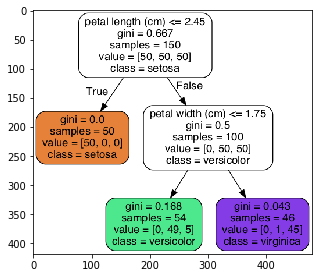

In [24]:
dot_data = StringIO()
filename = "iris.png"

export_graphviz(tree_clf,
               feature_names=iris.feature_names[2:],
               out_file=dot_data,
               class_names=iris.target_names,
               rounded = True,
               filled = True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(5, 10))
plt.imshow(img, interpolation='nearest')

#### **Making Predictions** 

In [116]:
# decision boundary plot function
def plot_decision_boundary(clf, X, Y, cmap='Paired_r'):
    h = 0.02
    x_min, x_max = X[:,0].min() - 10*h, X[:,0].max() + 10*h
    y_min, y_max = X[:,1].min() - 10*h, X[:,1].max() + 10*h
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8,5))
    plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.25)
    plt.contour(xx, yy, Z, colors='k', linewidths=0.7)
    plt.scatter(X[:,0], X[:,1], c=Y, cmap=cmap, edgecolors='k');

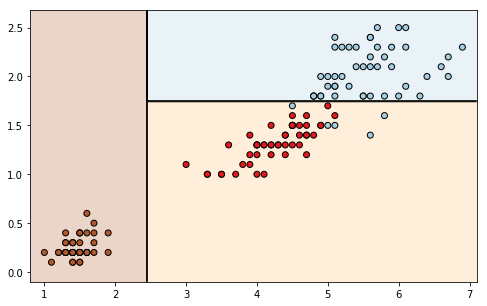

In [117]:
plot_decision_boundary(tree_clf, X, y)

#### **Estimating class probablities**
* Example of a flower that has 5-cm long and 1.5-cm wide petals

In [118]:
print('The predict class of the flower is', tree_clf.predict([[5, 1.5]]))
print('The probability of all predication are',tree_clf.predict_proba([[5, 1.5]]))

The predict class of the flower is [1]
The probability of all predication are [[0.         0.90740741 0.09259259]]


#### **Hyperparameter regularization**
#### using the regularized hyperparameter and the entropy for the Decision Tree

In [9]:
tree_clf1 = DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=4)
tree_clf1.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

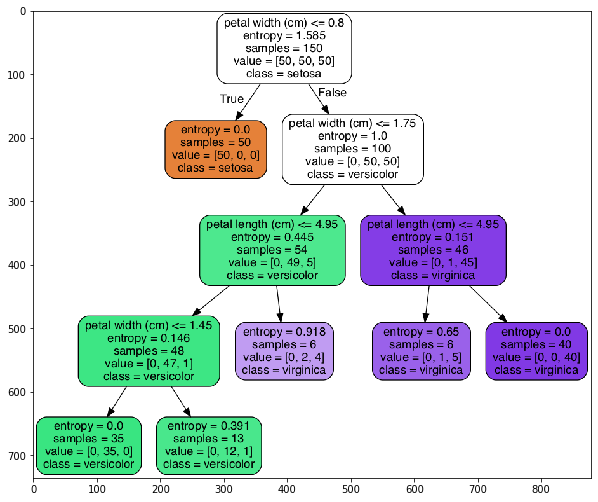

In [11]:
dot_data = StringIO()
filename = "iris1.png"

export_graphviz(tree_clf1,
               feature_names=iris.feature_names[2:],
               out_file=dot_data,
               class_names=iris.target_names,
               rounded = True,
               filled = True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(10, 20))
plt.imshow(img,interpolation='nearest')

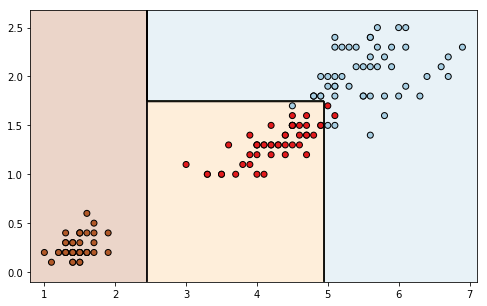

In [121]:
plot_decision_boundary(tree_clf1, X, y)

### 2. Regression

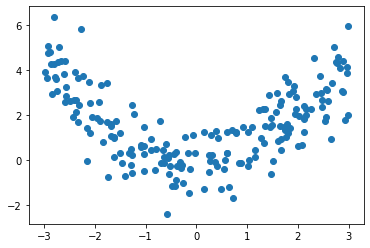

In [22]:
m = 200
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + np.random.randn(m, 1)
plt.scatter(X, y)
plt.show()

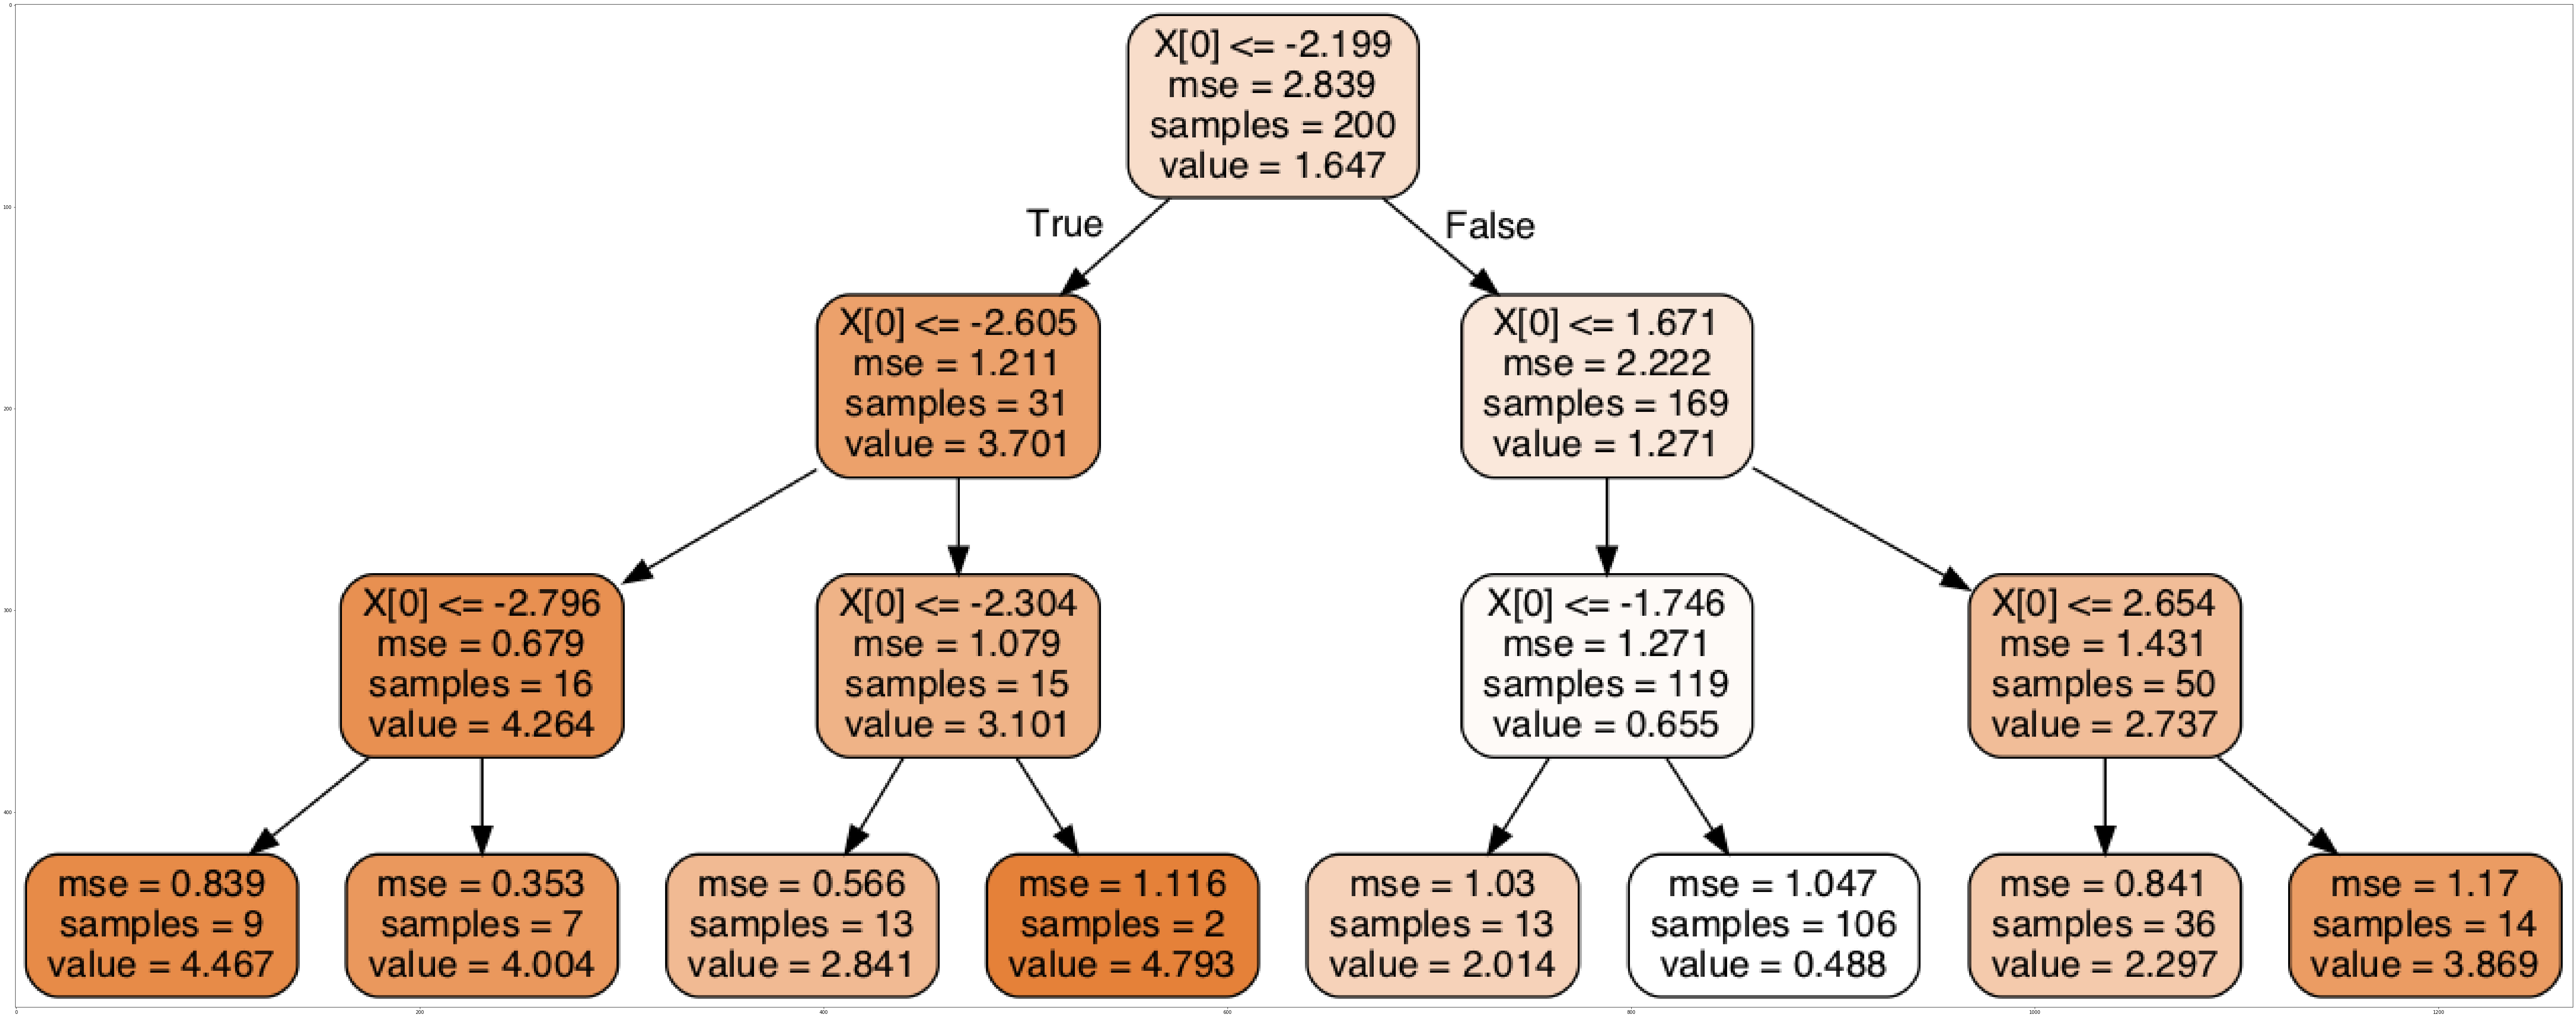

In [25]:
from sklearn.tree import DecisionTreeRegressor

tree_reg =  DecisionTreeRegressor(max_depth=3)
tree_reg.fit(X, y)

dot_data = StringIO()
filename = "reg.png"

export_graphviz(tree_reg,
               out_file=dot_data,
               rounded = True,
               filled = True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

In [26]:
# decision boundary plot function
def plot_decision_boundary_mod(clf, X, Y, cmap='Paired_r'):
    h = 0.02
    x_min, x_max = X[:,].min() - 10*h, X[:,].max() + 10*h
    y_min, y_max = Y[:,].min() - 10*h, Y[:,].max() + 10*h
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(6,6))
    plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.25)
    plt.contour(xx, yy, Z, colors='k', linewidths=0.7)
    plt.scatter(X[:,], y[:,], cmap=cmap, edgecolors='k');

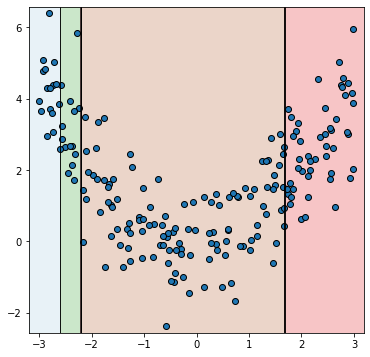

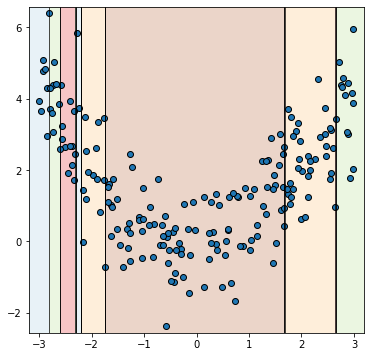

In [27]:
depth_list= [2, 3]

for depth in depth_list:
    tree_reg =  DecisionTreeRegressor(max_depth=depth)
    tree_reg.fit(X, y)
    plot_decision_boundary_mod(tree_reg, X, y)

#### Reducing overfitting by set up the `min_samples_leaf`

In [37]:
tree_reg1 =  DecisionTreeRegressor(random_state=40)
tree_reg2 =  DecisionTreeRegressor(random_state=40, min_samples_leaf=10)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=10, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=40, splitter='best')

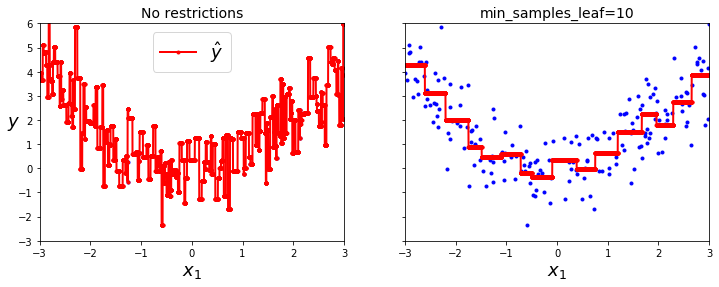

In [48]:
x1 = np.linspace(-3, 3, 5000).reshape(-1, 1)
y_pred1 = tree_reg1.predict(x1)
y_pred2 = tree_reg2.predict(x1)

fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharey=True)

axes[0].plot(X, y, "b.")
axes[0].plot(x1, y_pred1, "r.-", linewidth=2, label=r"$\hat{y}$")
axes[0].axis([-3, 3, -2, 6])
axes[0].set_xlabel("$x_1$", fontsize=18)
axes[0].set_ylabel("$y$", fontsize=18, rotation=0)
axes[0].legend(loc="upper center", fontsize=18)
axes[0].set_title("No restrictions", fontsize=14)

axes[1].plot(X, y, "b.")
axes[1].plot(x1, y_pred2, "r.-", linewidth=2, label=r"$\hat{y}$")
axes[1].axis([-3, 3, -3, 6])
axes[1].set_xlabel("$x_1$", fontsize=18)
axes[1].set_title("min_samples_leaf={}".format(tree_reg2.min_samples_leaf), fontsize=14)

plt.show()